In [4]:
import h5py
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
%config InlineBackend.figure_format = 'png'
import numpy as np
import floatpy.readers.padeops_reader as por

xdir = 0;
zdir = 2;

def mean_xz(q3D):
    tmp = np.mean(q3D,axis=zdir)
    return np.mean(tmp,axis=xdir)

def growth_rates(filename_prefix):
    fname = filename_prefix+'growth.dat'
    dat = np.fromfile(fname,dtype=float, count=-1, sep=' ')
    n = np.size(dat)

    nstats=3
    dat = np.reshape(dat,[n/nstats,nstats])
    time = dat[:,0]
    dtheta = dat[:,1]
    domega = dat[:,2]
    return time,dtheta,domega 

# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc02/rr1/256x512x128_no_tkeb/' #50,90
directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc02/rr1/724x1024x362/' #
# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc02/rr_7/256x512x128/' #40,46
# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc02/rr7/256x512x128/' #45,68
# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc04/rr1/256x512x128/' #30,40
# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc08/rr1/512x724x256/' #34,40
filename_prefix = directory+'/shearlayer_'
reader = por.PadeopsReader(filename_prefix, periodic_dimensions=(True,False,True))
[Nx,Ny,Nz] = reader.domain_size
[x,y,z] = reader.readCoordinates()
yplot = y[0,:,0]
print(reader.steps)

time,dtheta,domega = growth_rates(directory+'/shearlayer_')

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30)


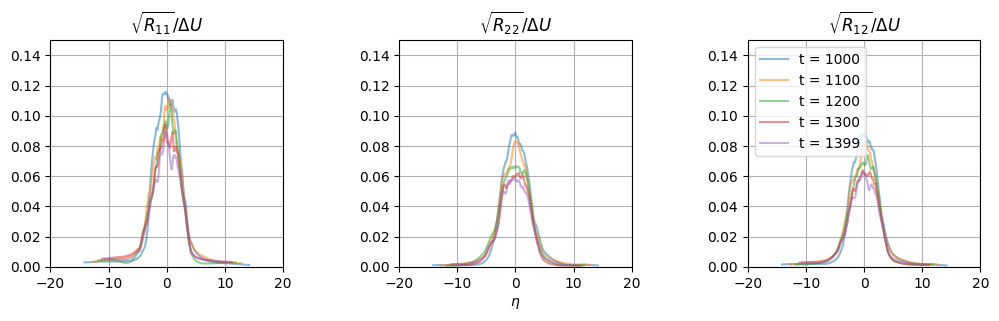

In [5]:
# Plot R11,R22,R12 stress profiles
fig, ax = plt.subplots(1,3, figsize=(12,3), dpi=100)

ts = 20
te = 30
tskip = 2
for step in range(ts,te,tskip):
    reader.step = step
    q = reader.readData(('u','v'))
    q = np.array(q)
    u = q[0,:,:,:]
    v = q[1,:,:,:]
    ubar = mean_xz(u)
    vbar = mean_xz(v)
    uprime1D = u - ubar[None,:,None];
    vprime1D = v - vbar[None,:,None];
    
    uu = mean_xz(abs(uprime1D))
    vv = mean_xz(abs(vprime1D))
    uv = mean_xz(np.sqrt(abs(uprime1D)*abs(vprime1D)))

    U1 = ubar[Ny-1]
    U2 = ubar[0]
    du = U1-U2
    d = dtheta[np.argmin(abs(time-reader.time))]

    ax[0].plot(yplot/d,uu/du,alpha=0.5)
    ax[1].plot(yplot/d,vv/du,alpha=0.5)
    ax[2].plot(yplot/d,uv/du,alpha=0.5,label='t = %i'%reader.time)

ax[2].legend()
ax[0].set_title('$\sqrt{R_{11}}/\Delta U$')
ax[1].set_title('$\sqrt{R_{22}}/\Delta U$')
ax[2].set_title('$\sqrt{R_{12}}/\Delta U$')
ax[1].set_xlabel('$\eta$')
plt.subplots_adjust(wspace=0.5,hspace=0.1)

for a in ax:
    a.set_xlim([-20,20])
    a.set_ylim([0,0.15])
    a.grid(True)

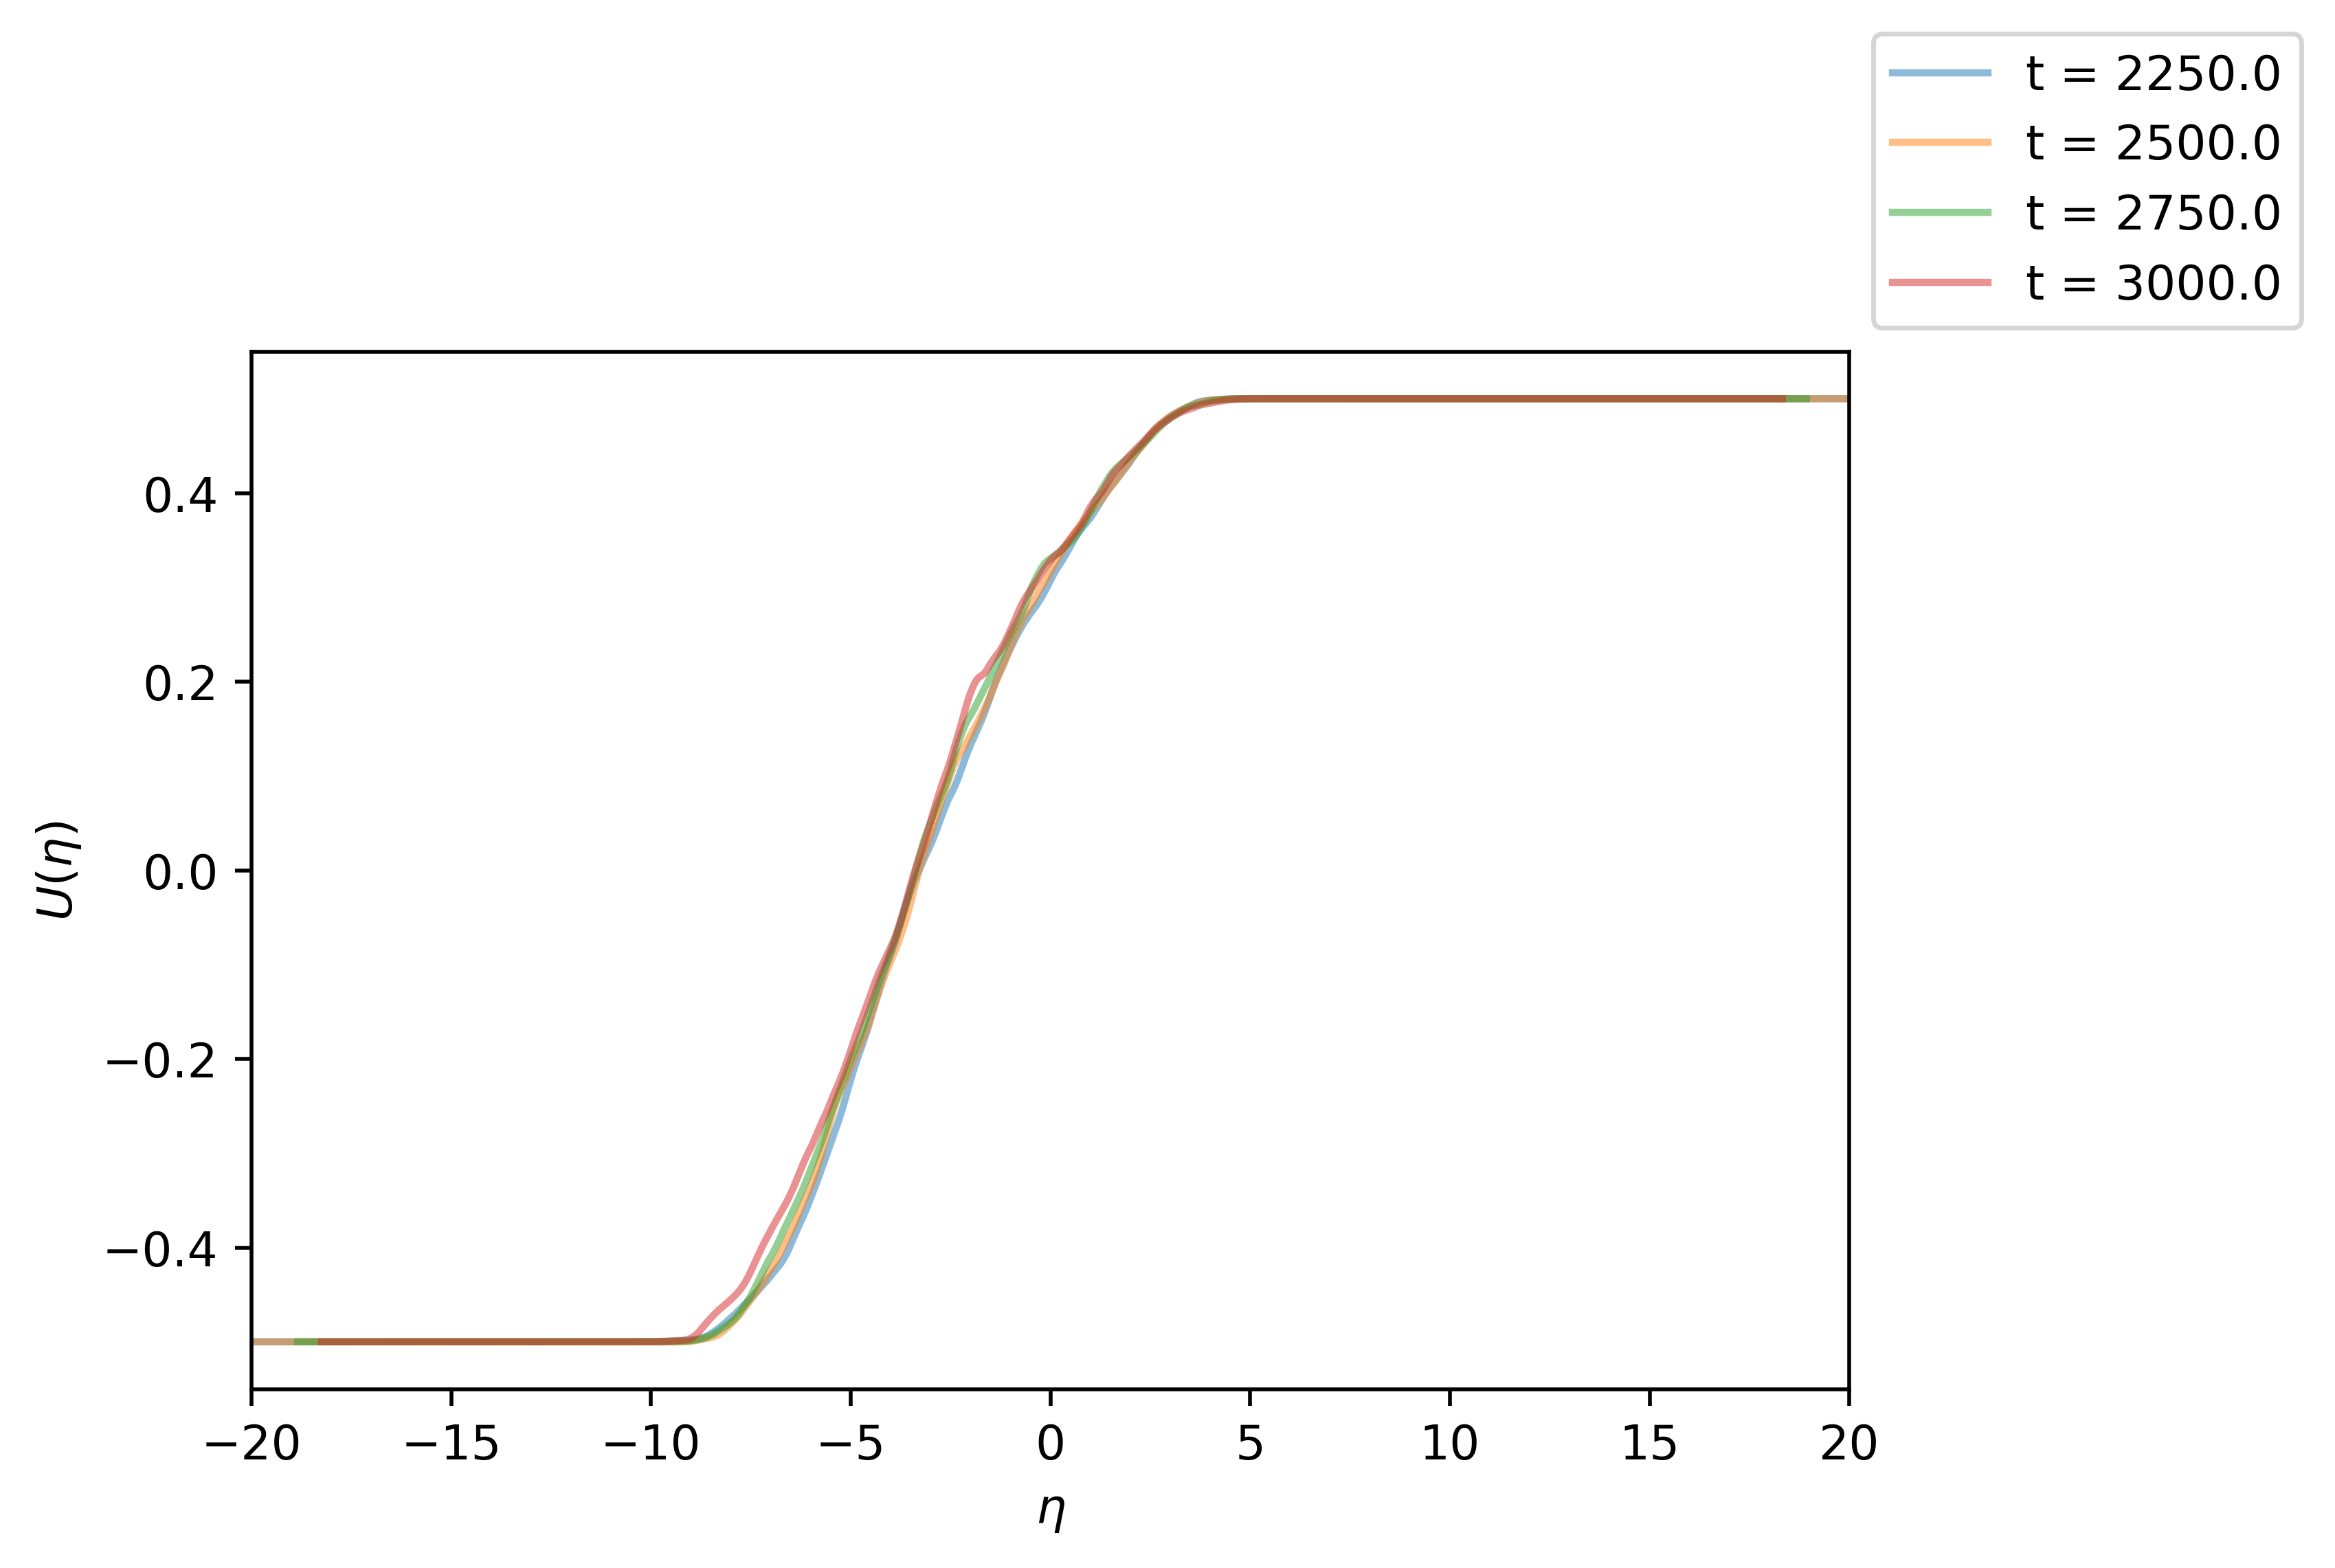

In [20]:
# Plot mean u, normalized

plt.figure(figsize=(6,4),dpi=500)

ts = 45
te = 65
tskip = 5
count = 0
unorm_sum = np.zeros(Ny)
for step in range(ts,te,tskip):
    reader.step = step
    step = step-id_shift
    u = reader.readData(('u'))
    u = np.array(u)
    ubar = mean_xz(u[0,:,:,:])
    U1 = ubar[Ny-1]
    U2 = ubar[0]
    du = U1-U2
    unorm = (ubar-U2)/(du)- 0.5
    
    d = dtheta[np.argmin(abs(time-reader.time))]
    plt.plot(yplot/d,unorm,alpha=0.5,label='t = {}'.format(reader.time))
    unorm_sum = unorm_sum + unorm
    count = count+1
    
plt.xlim([-20,20])
plt.xlabel('$\eta$')
plt.ylabel('$U(\eta)$')
plt.legend(bbox_to_anchor=(1., 1.))
